## Part 1: Stock Data + State Level Data

In [115]:
import datetime, quandl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')

In [4]:
import pandas_datareader as web
import datetime as dt

In [32]:
#select some stocks as important factors
start, end = dt.datetime(1992, 1, 1), dt.datetime(2017, 12, 31)

walmart = web.DataReader("WMT", "yahoo", start, end)
coca = web.DataReader("KO", "yahoo", start, end)
gm = web.DataReader("GM", "yahoo", start, end)
nike = web.DataReader("NKE", "yahoo", start, end)
fedex = web.DataReader("FDX", "yahoo", start, end)
boa = web.DataReader("BAC", "yahoo", start, end)

In [54]:
# AR - state
wmt_stocks_1 = pd.DataFrame({"WMT": walmart["Adj Close"]})
wmt_stocks = wmt_stocks_1.reset_index(level='Date')
wmt_stocks['Year'] =wmt_stocks['Date'].apply(lambda x: str(x)[:4]) 
wmt_stocks_year = wmt_stocks.groupby(['Year'], as_index=False)[['WMT']].mean()
wmt_stocks_year = wmt_stocks_year.rename(columns={'Year': 'year'})
wmt_stocks_year['year'] = wmt_stocks_year['year'].astype('int64')
wmt_stocks_year.head()

,year,WMT
0,1992,9.179152
1,1993,9.151106
2,1994,8.201161
3,1995,8.204924
4,1996,8.354423


In [55]:
# GA -state
coca_stocks_1 = pd.DataFrame({"COCA": coca["Adj Close"]})
coca_stocks = coca_stocks_1.reset_index(level='Date')
coca_stocks['Year'] =coca_stocks['Date'].apply(lambda x: str(x)[:4]) 
coca_stocks_year = coca_stocks.groupby(['Year'], as_index=False)[['COCA']].mean()
coca_stocks_year = coca_stocks_year.rename(columns={'Year': 'year'})
coca_stocks_year['year'] = coca_stocks_year['year'].astype('int64')
coca_stocks_year.head()

,year,COCA
0,1992,3.376184
1,1993,3.676704
2,1994,4.171581
3,1995,6.314413
4,1996,9.567615


In [56]:
# OR -state
nike_stocks_1 = pd.DataFrame({"NIKE": nike["Adj Close"]})
nike_stocks = nike_stocks_1.reset_index(level='Date')
nike_stocks['Year'] =nike_stocks['Date'].apply(lambda x: str(x)[:4]) 
nike_stocks_year = nike_stocks.groupby(['Year'], as_index=False)[['NIKE']].mean()
nike_stocks_year = nike_stocks_year.rename(columns={'Year': 'year'})
nike_stocks_year['year'] = nike_stocks_year['year'].astype('int64')
nike_stocks_year.head()

,year,NIKE
0,1992,0.103502
1,1993,0.123721
2,1994,0.200910
3,1995,0.527374
4,1996,1.420471


In [57]:
# TN - state
fedex_stocks_1 = pd.DataFrame({"FEDEX": fedex["Adj Close"]})
fedex_stocks = fedex_stocks_1.reset_index(level='Date')
fedex_stocks['Year'] =fedex_stocks['Date'].apply(lambda x: str(x)[:4]) 
fedex_stocks_year = fedex_stocks.groupby(['Year'], as_index=False)[['FEDEX']].mean()
fedex_stocks_year = fedex_stocks_year.rename(columns={'Year': 'year'})
fedex_stocks_year['year'] = fedex_stocks_year['year'].astype('int64')
fedex_stocks_year.head()

,year,FEDEX
0,1992,10.173414
1,1993,13.085052
2,1994,15.623521
3,1995,15.819569
4,1996,17.730171


In [58]:
# Charlotte, NC
boa_stocks_1 = pd.DataFrame({"BOA": boa["Adj Close"]})
boa_stocks = boa_stocks_1.reset_index(level='Date')
boa_stocks['Year'] =boa_stocks['Date'].apply(lambda x: str(x)[:4]) 
boa_stocks_year = boa_stocks.groupby(['Year'], as_index=False)[['BOA']].mean()
boa_stocks_year = boa_stocks_year.rename(columns={'Year': 'year'})
boa_stocks_year['year'] = boa_stocks_year['year'].astype('int64')
boa_stocks_year.head()

,year,BOA
0,1992,2.612444
1,1993,3.252392
2,1994,3.737898
3,1995,5.215832
4,1996,8.624744


In [37]:
path ='/Users/gyang/Desktop/yang_project/capstone/data/data set/'

ar_df=pd.read_table(path+'Arkansas.txt',sep='/',header=None)
ga_df=pd.read_table(path+'Georgia.txt',sep='/',header=None)
or_df=pd.read_table(path+'Oregon.txt',sep='/',header=None)
tn_df=pd.read_table(path+'Tennessee.txt',sep='/',header=None)
nc_df=pd.read_table(path+'North Carolina.txt',sep='/',header=None)

In [39]:
ar_df.columns=['year','month','net_change','total_expand','expand_establish',
                'open_establish','total_contract','contract_establish','end_establish']
ga_df.columns=['year','month','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish']
or_df.columns=['year','month','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish']
tn_df.columns=['year','month','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish']
nc_df.columns=['year','month','net_change','total_expand','expand_establish',
                     'open_establish','total_contract','contract_establish','end_establish']

In [41]:
ar_df.head()

,year,month,net_change,total_expand,expand_establish,open_establish,total_contract,contract_establish,end_establish
0,1992,September,457,53560,43487,10073,53103,42665,10438
1,1992,December,4999,55374,45557,9817,50375,41775,8600
2,1993,March,6367,58774,46444,12330,52407,41831,10576
3,1993,June,13834,60074,49177,10897,46240,37952,8288
4,1993,September,11118,59896,47254,12642,48778,40601,8177


In [51]:
ar_year = ar_df.groupby(['year'], as_index=False)[['net_change','total_expand','expand_establish',
                                                   'open_establish','total_contract','contract_establish',
                                                  'end_establish']].mean()
ga_year = ga_df.groupby(['year'], as_index=False)[['net_change','total_expand','expand_establish',
                                                   'open_establish','total_contract','contract_establish',
                                                  'end_establish']].mean()
or_year = or_df.groupby(['year'], as_index=False)[['net_change','total_expand','expand_establish',
                                                   'open_establish','total_contract','contract_establish',
                                                  'end_establish']].mean()
tn_year = tn_df.groupby(['year'], as_index=False)[['net_change','total_expand','expand_establish',
                                                   'open_establish','total_contract','contract_establish',
                                                  'end_establish']].mean()
nc_year = nc_df.groupby(['year'], as_index=False)[['net_change','total_expand','expand_establish',
                                                   'open_establish','total_contract','contract_establish',
                                                  'end_establish']].mean()
ar_year['year'] = ar_year['year'].astype('int64')
ga_year['year'] = ga_year['year'].astype('int64')
or_year['year'] = or_year['year'].astype('int64')
tn_year['year'] = tn_year['year'].astype('int64')
nc_year['year'] = nc_year['year'].astype('int64')

In [61]:
ar_state_merge_data =wmt_stocks_year.merge(ar_year,on='year')
ga_state_merge_data =coca_stocks_year.merge(ga_year,on='year')
or_state_merge_data =nike_stocks_year.merge(or_year,on='year')
tn_state_merge_data =fedex_stocks_year.merge(tn_year,on='year')
nc_state_merge_data =boa_stocks_year.merge(nc_year,on='year')

In [112]:
ga_state_merge_data

,year,COCA,net_change,total_expand,expand_establish,open_establish,total_contract,contract_establish,end_establish
0,1992,3.376184,29833.50,202935.50,156192.50,46743.00,173102.00,139095.50,34006.50
1,1993,3.676704,34190.25,213259.50,167872.75,45386.75,179069.25,147272.75,31796.50
2,1994,4.171581,37829.25,226232.50,182473.25,43759.25,188403.25,153054.25,35349.00
3,1995,6.314413,30384.50,237554.50,187546.75,50007.75,207170.00,169690.50,37479.50
4,1996,9.567615,26279.00,252762.75,196881.50,55881.25,226483.75,183649.50,42834.25
5,1997,13.218670,23833.00,260939.25,198858.00,62081.25,237106.25,182600.00,54506.25
6,1998,15.710432,28373.00,284843.00,212008.50,72834.50,256470.00,190180.00,66290.00
7,1999,13.613392,29553.00,289037.75,212396.00,76641.75,259484.75,193741.50,65743.25
8,2000,12.498156,15821.75,284088.25,210445.75,73642.50,268266.50,202439.25,65827.25
9,2001,11.297366,-31320.50,259283.50,190617.50,68666.00,290604.00,218152.00,72452.00


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats

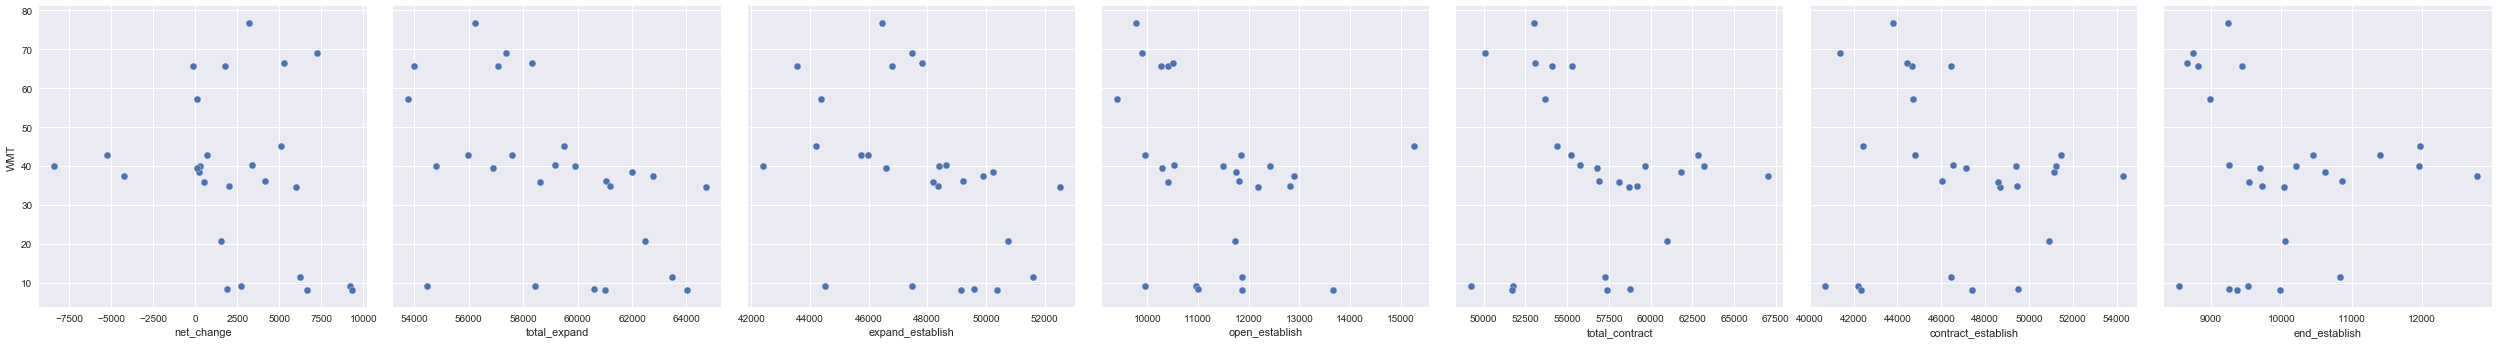

In [64]:
sns.pairplot(x_vars=['net_change','total_expand','expand_establish',
                    'open_establish','total_contract','contract_establish',
                    'end_establish'], y_vars=["WMT"], 
             data=ar_state_merge_data, size=5)

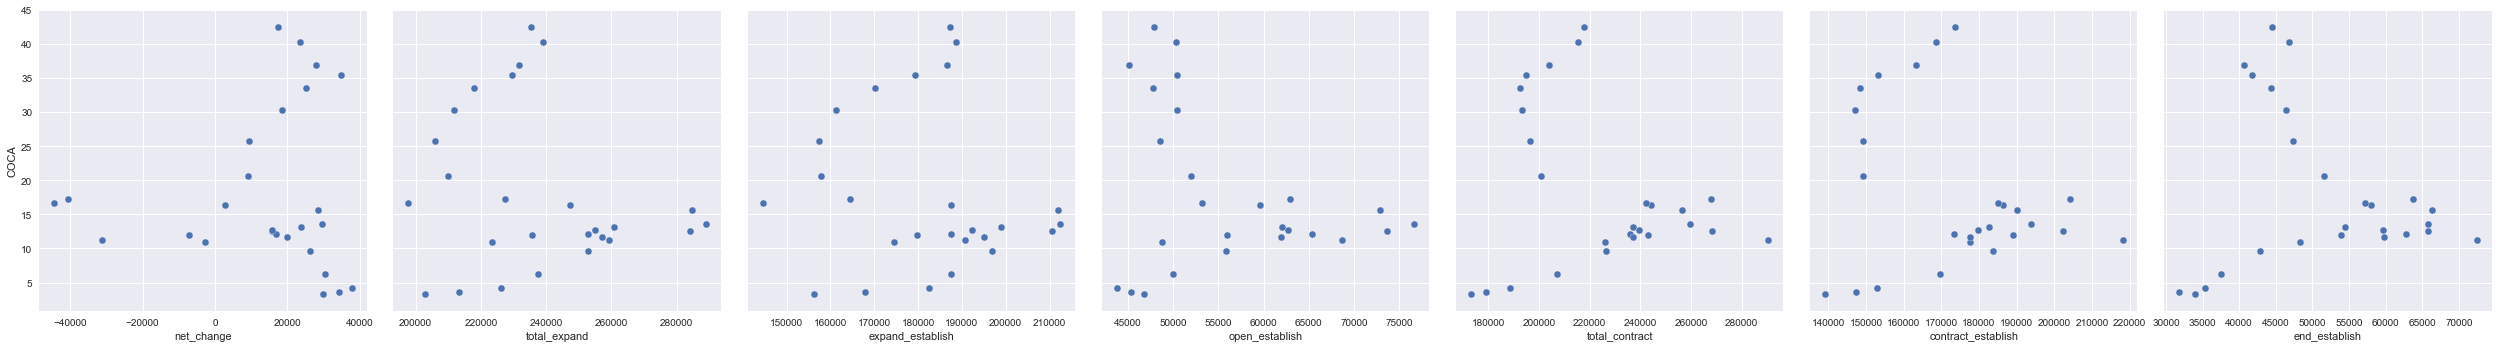

In [65]:
sns.pairplot(x_vars=['net_change','total_expand','expand_establish',
                    'open_establish','total_contract','contract_establish',
                    'end_establish'], y_vars=["COCA"], 
             data=ga_state_merge_data, size=5)

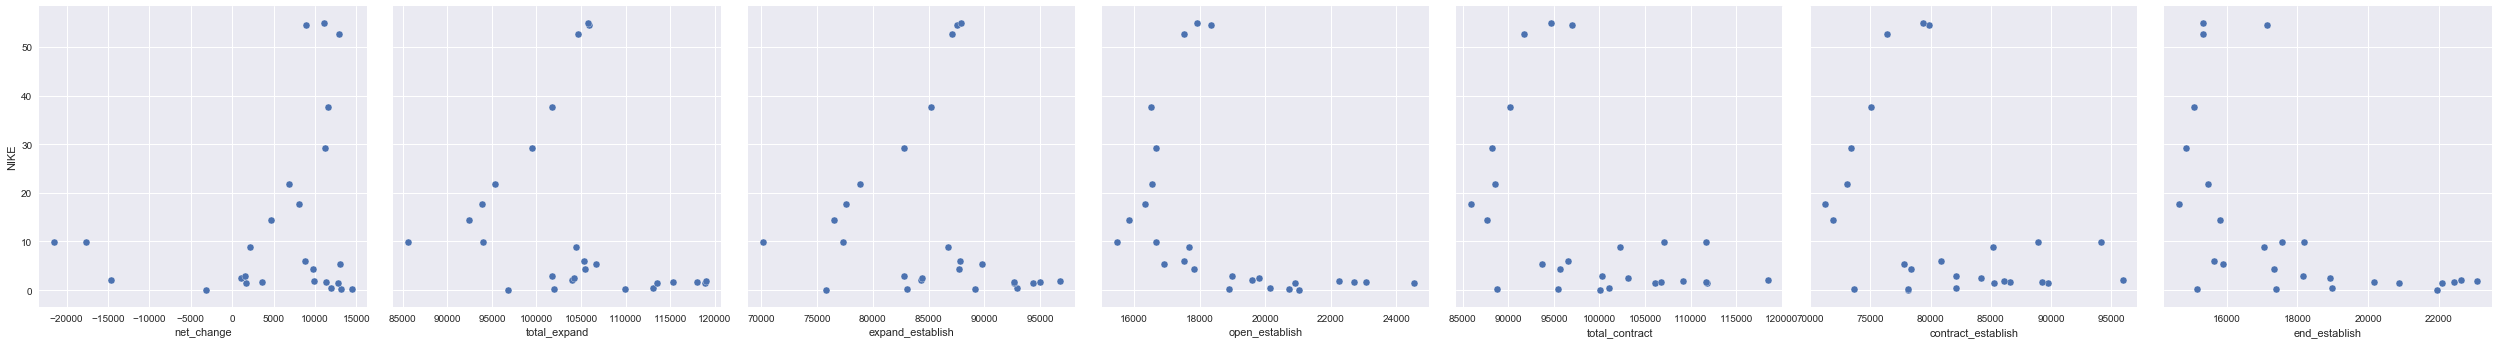

In [66]:
sns.pairplot(x_vars=['net_change','total_expand','expand_establish',
                    'open_establish','total_contract','contract_establish',
                    'end_establish'], y_vars=["NIKE"], 
             data=or_state_merge_data, size=5)

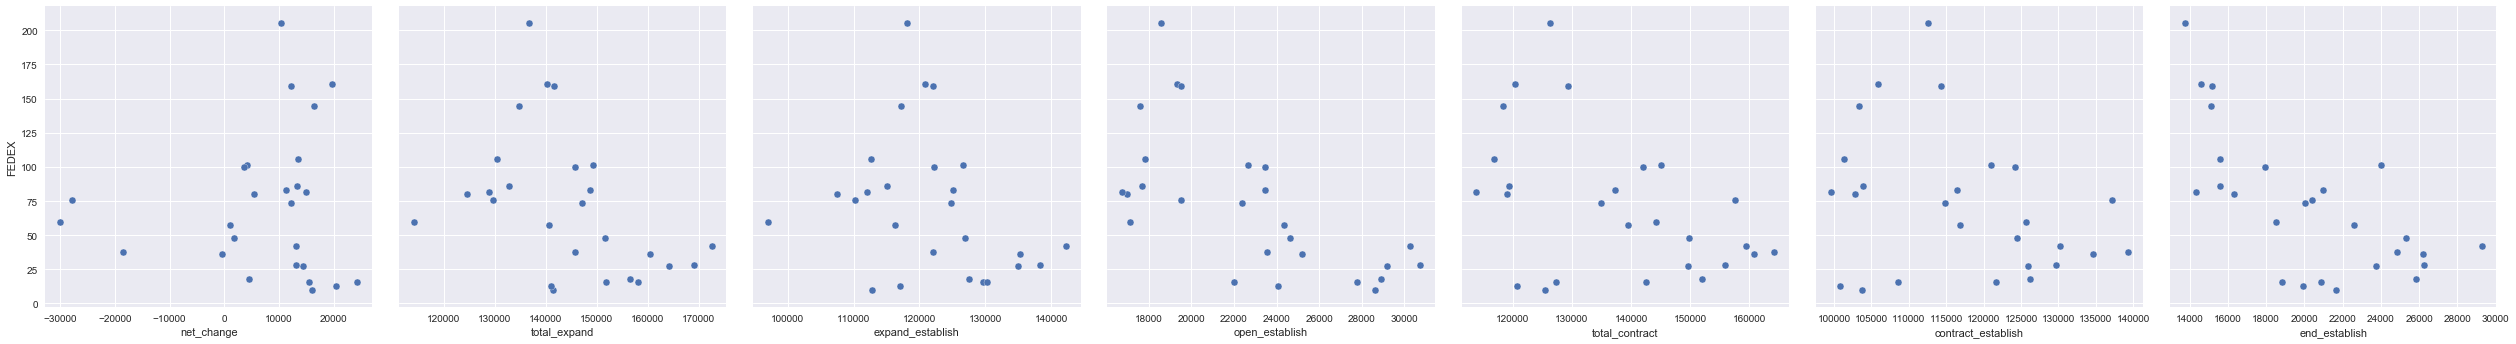

In [67]:
sns.pairplot(x_vars=['net_change','total_expand','expand_establish',
                    'open_establish','total_contract','contract_establish',
                    'end_establish'], y_vars=["FEDEX"], 
             data=tn_state_merge_data, size=5)

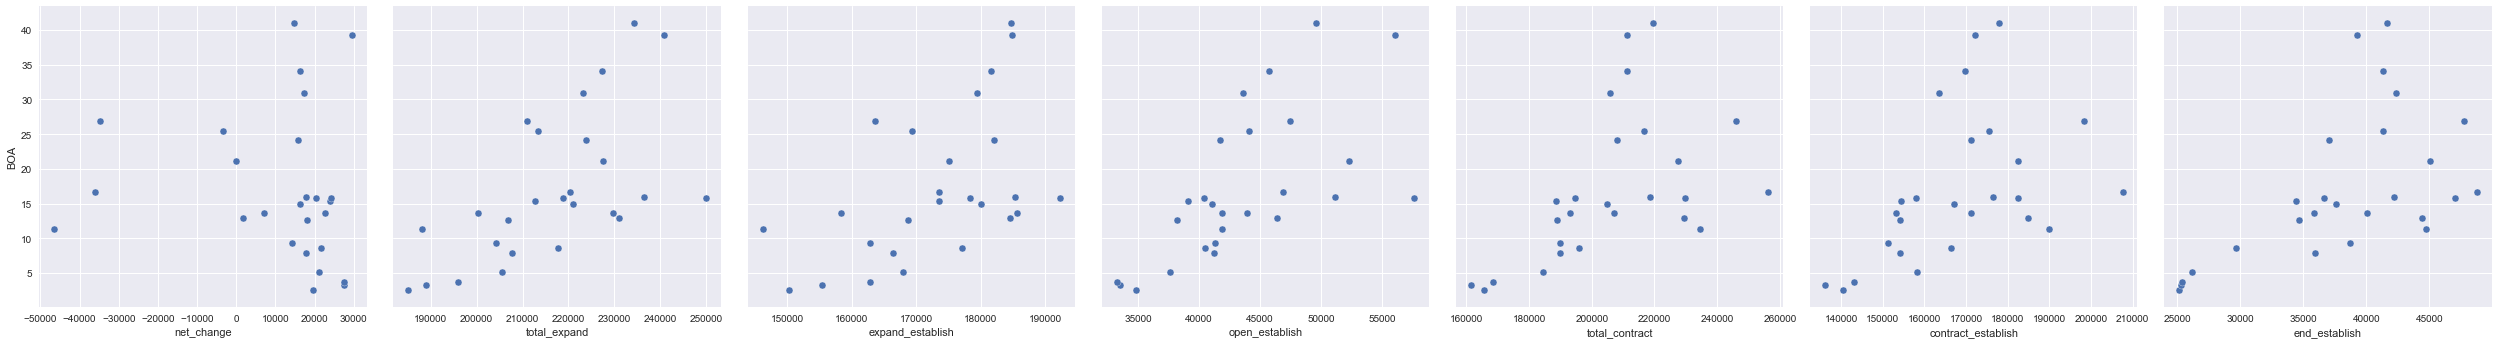

In [68]:
sns.pairplot(x_vars=['net_change','total_expand','expand_establish',
                    'open_establish','total_contract','contract_establish',
                    'end_establish'], y_vars=["BOA"], 
             data=nc_state_merge_data, size=5)

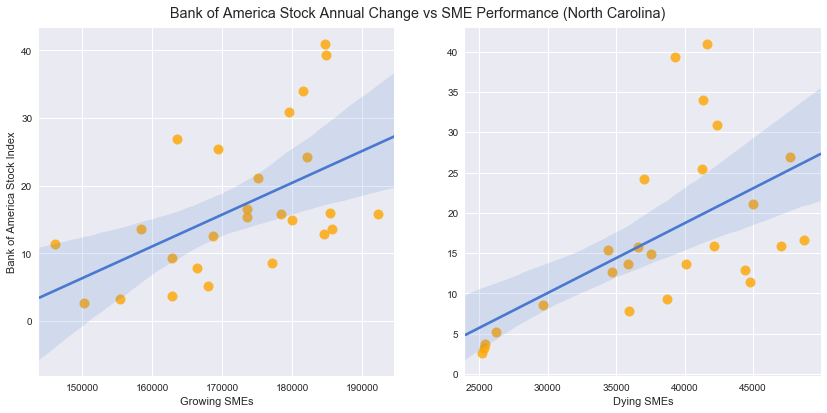

In [113]:
sns.set()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))

#add col 1 
sns.set_color_codes("muted")
sns.regplot('expand_establish','BOA',data=nc_state_merge_data,color="orange",ax=ax[0],
            line_kws ={'color':'b'},scatter_kws={"s": 100})
ax[0].set(ylabel="Bank of America Stock Index",xlabel="Growing SMEs")
sns.despine(left=True, bottom=True)

#add col 2 
sns.set_color_codes("muted")
sns.regplot('end_establish','BOA',data=nc_state_merge_data,color="orange",ax=ax[1],
            line_kws ={'color':'b'},scatter_kws={"s": 100})
ax[1].set(ylabel="",xlabel="Dying SMEs")
sns.despine(left=True, bottom=True)

fig.suptitle('Bank of America Stock Annual Change vs SME Performance (North Carolina)')
fig.subplots_adjust(top=0.93)

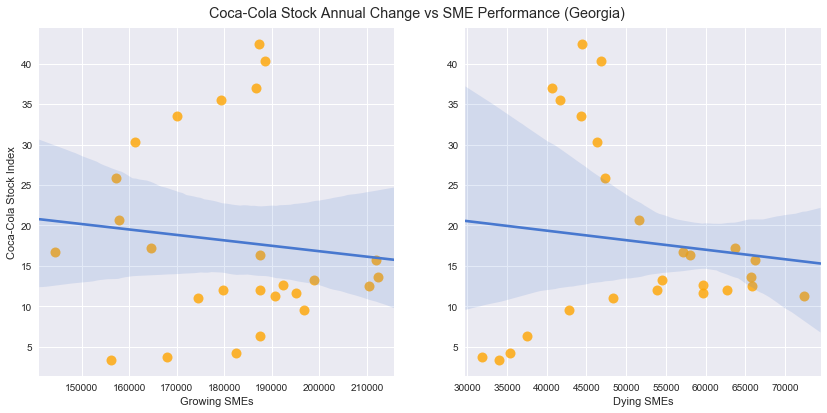

In [114]:
sns.set()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))

#add col 1 
sns.set_color_codes("muted")
sns.regplot('expand_establish','COCA',data=ga_state_merge_data,color="orange",ax=ax[0],
            line_kws ={'color':'b'},scatter_kws={"s": 100})
ax[0].set(ylabel="Coca-Cola Stock Index",xlabel="Growing SMEs")
sns.despine(left=True, bottom=True)

#add col 2 
sns.set_color_codes("muted")
sns.regplot('end_establish','COCA',data=ga_state_merge_data,color="orange",ax=ax[1],
            line_kws ={'color':'b'},scatter_kws={"s": 100})
ax[1].set(ylabel="",xlabel="Dying SMEs")
sns.despine(left=True, bottom=True)

fig.suptitle('Coca-Cola Stock Annual Change vs SME Performance (Georgia)')
fig.subplots_adjust(top=0.93)

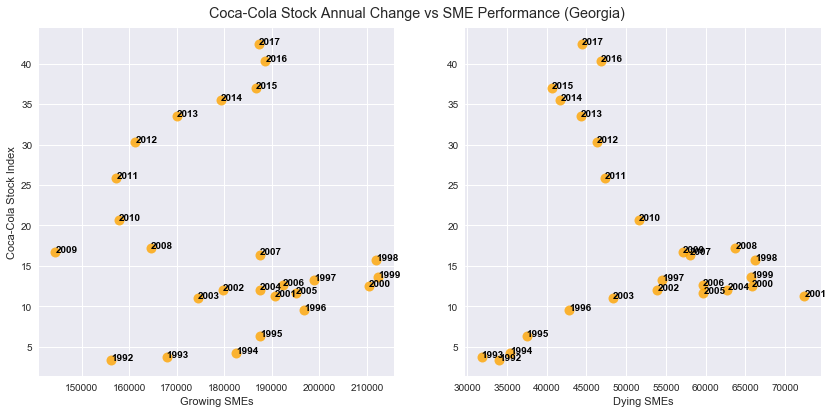

In [132]:
sns.set()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))

#add col 1 
sns.set_color_codes("muted")
p1 =sns.regplot('expand_establish','COCA',data=ga_state_merge_data,color="orange",ax=ax[0],
                 scatter_kws={"s": 100},fit_reg=False)
ax[0].set(ylabel="Coca-Cola Stock Index",xlabel="Growing SMEs")
# add annotations one by one with a loop
for line in range(0,ga_state_merge_data.shape[0]):
     p1.text(ga_state_merge_data.expand_establish[line]+0.2, ga_state_merge_data.COCA[line], 
             ga_state_merge_data.year[line], horizontalalignment='left', 
             size='small', color='black',weight='semibold')
sns.despine(left=True, bottom=True)


#add col 2 
sns.set_color_codes("muted")
p2 =sns.regplot('end_establish','COCA',data=ga_state_merge_data,color="orange",ax=ax[1],
                 scatter_kws={"s": 100},fit_reg=False)
ax[1].set(ylabel="",xlabel="Dying SMEs")
# add annotations one by one with a loop
for line in range(0,ga_state_merge_data.shape[0]):
     p2.text(ga_state_merge_data.end_establish[line]+0.2, ga_state_merge_data.COCA[line], 
             ga_state_merge_data.year[line], horizontalalignment='left', 
             size='small', color='black',weight='semibold')
sns.despine(left=True, bottom=True)

fig.suptitle('Coca-Cola Stock Annual Change vs SME Performance (Georgia)')
fig.subplots_adjust(top=0.93)

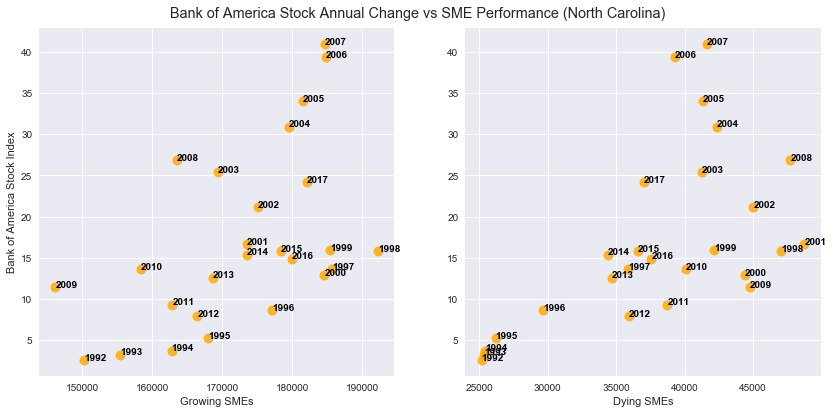

In [133]:
sns.set()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))

#add col 1 
sns.set_color_codes("muted")
p1 =sns.regplot('expand_establish','BOA',data=nc_state_merge_data,color="orange",ax=ax[0],
            fit_reg=False,scatter_kws={"s": 100})
ax[0].set(ylabel="Bank of America Stock Index",xlabel="Growing SMEs")

# add annotations one by one with a loop
for line in range(0,nc_state_merge_data.shape[0]):
     p1.text(nc_state_merge_data.expand_establish[line]+0.2, nc_state_merge_data.BOA[line], 
             nc_state_merge_data.year[line], horizontalalignment='left', 
             size='small', color='black',weight='semibold')
sns.despine(left=True, bottom=True)

#add col 2 
sns.set_color_codes("muted")
p2 =sns.regplot('end_establish','BOA',data=nc_state_merge_data,color="orange",ax=ax[1],
            fit_reg=False,scatter_kws={"s": 100})

# add annotations one by one with a loop
for line in range(0,nc_state_merge_data.shape[0]):
     p2.text(nc_state_merge_data.end_establish[line]+0.2, nc_state_merge_data.BOA[line], 
             nc_state_merge_data.year[line], horizontalalignment='left', 
             size='small', color='black',weight='semibold')
ax[1].set(ylabel="",xlabel="Dying SMEs")
sns.despine(left=True, bottom=True)

fig.suptitle('Bank of America Stock Annual Change vs SME Performance (North Carolina)')
fig.subplots_adjust(top=0.93)